In [14]:
import csv

def loadData(filename,inputVariabNames,outputVariabName):
    data=[]
    dataNames=[]
    with open(filename) as csv_file:
        csv_reader= csv.reader(csv_file,delimiter=',')
        line_count=0
        
        for row in csv_reader:
            if line_count==0:
                dataNames=row
                
                
            else:
                data.append(row)
            line_count+=1
        
    selectedIndexInput_1= dataNames.index(inputVariabNames[0])
    selectedIndexInput_2= dataNames.index(inputVariabNames[1])
    selectedIndexOutput= dataNames.index(outputVariabName)
    
    inputs=[[float(data[i][selectedIndexInput_1]), float(data[i][selectedIndexInput_2])] for i in range(len(data))]
    outputs=[float(data[i][selectedIndexOutput]) for i in range(len(data))]
    
    
    return inputs,outputs




In [15]:
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d

def plotData(x1,y1,x2=None,y2=None,x3=None,y3=None,title=None):
    
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    
    if (x1):
        ax.scatter([x[0] for x in x1],[x[1] for x in x1], y1, c=y1, cmap='hot', linewidth=1) 
    if (x3):
        ax.scatter([x[0] for x in x3],[x[1] for x in x3], y3, c=y3, cmap='cool', linewidth=1) 
    if (x2):
        ax.plot3D([x[0] for x in x3],[x[1] for x in x3], y3, color='Greens')
    
    ax.set_title(title)
    plt.show()
    
    
def plotData_2(x1,y1,x2=None,y2=None,x3=None,y3=None,title=None):
    
    fig=plt.figure(figsize=(10,7))
    ax=fig.add_subplot(111,projection='3d')
    
    if (x1):
        img =ax.scatter([x[0] for x in x1],[x[1] for x in x1], y1, c=y1, cmap='hot', linewidth=1) 
        fig.colorbar(img)
    if (x3):
        img_2 =ax.scatter([x[0] for x in x3],[x[1] for x in x3], y3, c=y3, cmap='cool', linewidth=1) 
        fig.colorbar(img_2)
    if (x2):
        img_3 =ax.scatter([x[0] for x in x2],[x[1] for x in x2], y2, c=y2, cmap='hot', linewidth=1)
        fig.colorbar(img_3)

    ax.set_title(title)
    plt.show()
    ax.set_title(title)
    plt.show()
    


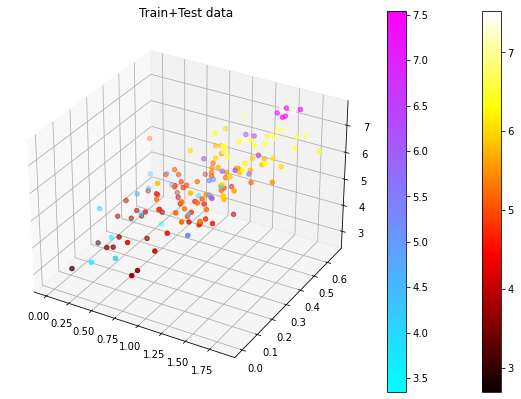

In [16]:
inputs,outputs=loadData('world-happiness-report-2017.csv',['Economy..GDP.per.Capita.','Freedom'],'Happiness.Score')
import numpy as np

np.random.seed(5)

indexes=[i for i in range(len(inputs))]

trainSamples=np.random.choice(indexes, int(0.8*len(indexes)), replace=False)
testSamples= [i for i in indexes if not i in trainSamples]

trainInputs=[inputs[i] for i in trainSamples]
trainOutputs=[outputs[i] for i in trainSamples]

testInputs=[inputs[i] for i in testSamples]
testOutputs=[outputs[i] for i in testSamples]

plotData_2(trainInputs,trainOutputs,[],[],testInputs,testOutputs,'Train+Test data')


In [17]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

def normalisation_scaler(trainData,testData):
    
    scaler= StandardScaler()
    if not isinstance(trainData[0],list):
        trainData=[[el] for el in trainData]
        testData=[[el] for el in testData]
        
        scaler.fit(trainData)
        
        normalisedTrainData= scaler.transform(trainData)
        normalisedTestData= scaler.transform(testData)
        
        normalisedTrainData=[el[0] for el in normalisedTrainData]
        normalisedTestData=[el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)
        normalisedTrainData= scaler.transform(trainData)
        normalisedTestData= scaler.transform(testData)
        
    return normalisedTrainData,normalisedTestData


In [18]:
def normalisation_Z_score(feature):
    
    mean= sum(feature)/len(feature)
    stdDev=(1/len(feature) * sum( [ (f-mean) ** 2 for f in feature] ) )**0.5
    normalised_feature= [(f-mean)/stdDev for f in feature]
    
    return normalised_feature


In [19]:
def normalisation_score01(feature):
    minFeat=min(feature)
    maxFeat=max(feature)
    scaledFeatures=[(feat-minFeat)/(maxFeat-minFeat) for feat in feature]
    
    return scaledFeatures

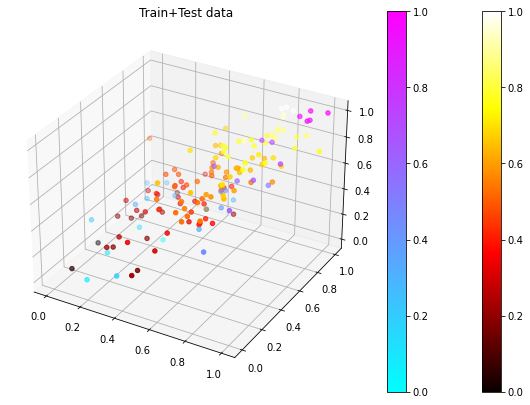

In [20]:

normalisedTrainDataInputZScore=[[x1,x2] for x1,x2 in zip(normalisation_Z_score([x[0] for x in trainInputs]),normalisation_Z_score([x[1] for x in trainInputs]))]
normalisedTestDataInputZScore=[[x1,x2] for x1,x2 in zip(normalisation_Z_score([x[0] for x in testInputs]),normalisation_Z_score([x[1] for x in testInputs]))]
normalisedTrainDataOutputZScore=normalisation_Z_score(trainOutputs)
normalisedTestDataOutputZScore=normalisation_Z_score(testOutputs)

train_in_score01=[[x1,x2] for x1,x2 in zip(normalisation_score01([x[0] for x in trainInputs]),normalisation_score01([x[1] for x in trainInputs]))]
train_out_score01=normalisation_score01(trainOutputs)

test_in_score01=[[x1,x2] for x1,x2 in zip(normalisation_score01([x[0] for x in testInputs]),normalisation_score01([x[1] for x in testInputs]))]
test_out_score01=normalisation_score01(testOutputs)


plotData_2(train_in_score01,train_out_score01,[],[],test_in_score01,test_out_score01,'Train+Test data')


In [21]:
from sklearn import linear_model
from SGD import MySGDRegression

regresser_1=linear_model.SGDRegressor()
regresser_1.fit(train_in_score01,train_out_score01)

regresser_2=MySGDRegression()
regresser_2.fit(train_in_score01,train_out_score01)

print("Tool SGD Regressor: f(x)= ", regresser_1.intercept_[0]," + ", regresser_1.coef_[0]," * x1 + ",regresser_1.coef_[1]," * x2")
print("Manual SGD Regressor: f(x)= ", regresser_2.intercept_," + ", regresser_2.coef_[0]," * x1 + ",regresser_2.coef_[1]," * x2")


Tool SGD Regressor: f(x)=  0.2931158360402555  +  0.23583374968812756  * x1 +  0.22513567285454714  * x2
Manual SGD Regressor: f(x)=  -0.03154715716325963  +  0.720798069476326  * x1 +  0.3158918997756957  * x2


Tool SGD regressor: 
Prediction error(manual):  0.046029476912571164
Prediction error(tool):  0.046029476912571164


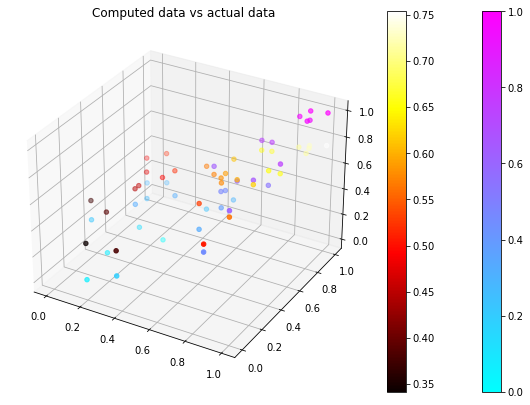

Manual SGD regressor: 
Prediction error(manual):  0.02089624192832668
Prediction error(tool):  0.020896241928326672


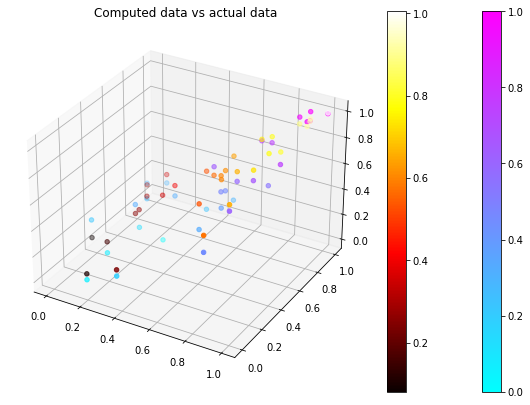

In [22]:
from sklearn.metrics import mean_squared_error

computedTestOutputs_1=regresser_1.predict(test_in_score01)

computedTestOutputs_2=regresser_2.predict(test_in_score01)


def precision_error(computedOutputs,actualOutputs):
    error=0.0
    
    for t1,t2 in zip(computedOutputs,actualOutputs):
        error+=(t1-t2)**2
    error/=len(computedOutputs)
    
    print("Prediction error(manual): ",error)
    
    error=mean_squared_error(actualOutputs,computedOutputs)
    
    print("Prediction error(tool): ",error)
    
print("Tool SGD regressor: ")
precision_error(computedTestOutputs_1,test_out_score01)


plotData_2([],[],test_in_score01,computedTestOutputs_1,test_in_score01,test_out_score01,'Computed data vs actual data ')


print("Manual SGD regressor: ")
precision_error(computedTestOutputs_2,test_out_score01)

plotData_2([],[],test_in_score01,computedTestOutputs_2,test_in_score01,test_out_score01,'Computed data vs actual data')


In [23]:

from BatchGD import MyBatchRegression

regresser_3=MyBatchRegression()

regresser_3.fit(train_in_score01,train_out_score01)

computedTestOutputs_3=regresser_3.predict(test_in_score01)


In [24]:

def iter_minibatches(inputs,outputs,batch_size):
    chunkStartMaker=0
    chunks=[]
    while(chunkStartMaker<len(inputs)):
        x_chunk= inputs[chunkStartMaker:chunkStartMaker+batch_size]
        y_chunk= outputs[chunkStartMaker:chunkStartMaker+batch_size]
        yield x_chunk,y_chunk
        chunkStartMaker+=batch_size


Manual BGD regressor: 
Prediction error(manual):  0.02098931413981077
Prediction error(tool):  0.02098931413981077


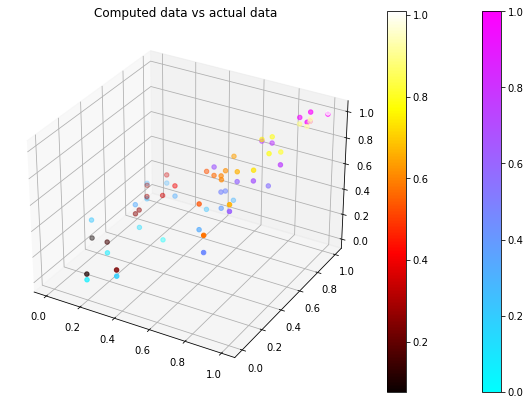

Parameterization for SGD Regressor to get Batch Regressor: 
Prediction error(manual):  0.02407783114794562
Prediction error(tool):  0.02407783114794562


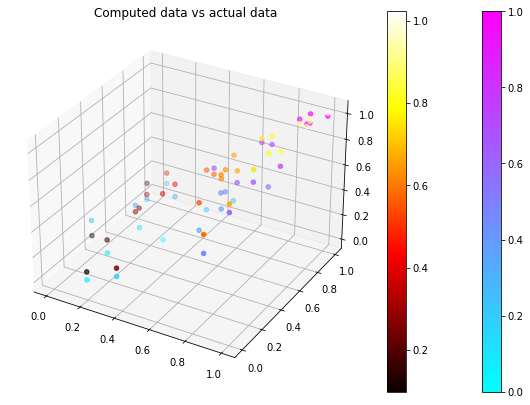

In [25]:
import random

regresser_4=linear_model.SGDRegressor(learning_rate='constant', alpha=0,eta0=0.13,shuffle=True)

bish=iter_minibatches(train_in_score01,train_out_score01,1)
chunks=list(bish)

for _ in range (len(inputs)-1):
    random.shuffle(chunks)
    for x_chunks,y_chunks in chunks:
        regresser_4.partial_fit(x_chunks,y_chunks)
        

computedTestOutputs_4=regresser_4.predict(test_in_score01)


print("Manual BGD regressor: ")
precision_error(computedTestOutputs_3,test_out_score01)
plotData_2([],[],test_in_score01,computedTestOutputs_3,test_in_score01,test_out_score01,'Computed data vs actual data')


print("Parameterization for SGD Regressor to get Batch Regressor: ")
precision_error(computedTestOutputs_4,test_out_score01)   
plotData_2([],[],test_in_score01,computedTestOutputs_4,test_in_score01,test_out_score01,'Computed data vs actual data')

